In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
#we are defining a dictionary that takes a numeric fruit label as the input key and returns a value that's a string with the name of the fruit.
#this will make it easier to convert the output of a classifier prediction to something a person can more easily interpret, the name of a fruit in this case
#this is important because our algorithm will classify our test split as a numeric value and we have to tranlate that to a string name of our fruit
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create a train-test split

In [3]:
#since our only source of labelled data is the dataset we have been given, to estimate how well the classifier 
#will do in future samples, what we do is split the original dataset into two parts. 
#we will have an array of labeeled data called the training set that will be used to train the clasifier 
#and then we'll hold out the remaining labelled samples and put them into a separate array called the test set
#that will be used to evaluate the trained clasifier.
#to create training and test sets from an input dataset, scikitlearn provides a handy function that will do this split for u 
#it is called, unsurprisingly, train_test_split.

#we will define a variable X that holds the features(mass, width and height)  of our dataset without the labels
#this collection of features is called the feature space
x = fruits[['mass', 'width', 'height', 'color_score']] 
#we define the second variable y to hold the corresponding labels for the instances in feature space x
y = fruits['fruit_label']

#now we can pass x and y to the train test split function in scikit-learn
#normally the splitting into training and testing is done randomly but for this lecture we want to get the same result so we set our random state parameter as zero

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#this function randomly shuffles the dataet and split off a certain percentage of input sample for use as a training set,
#and then puts the remaining samples into a different variable for use as a test set. 
#so, in thi example we are using a  75-25% split of training vs test data. and thats a pretty standard relative split that is used

## Examining the data

- Some reasons as to why looking at the data initially is important
    1. Inspecting feature values may help identify what cleaning or preprocesing still needs to be done   once you can see the range or distribution of values that is typical for each attribute.
    2. you might notice missing or noisy data, or inconsistences such as the wrong data type being used for a column, incorrect measures of measurements for a particular column or that there aren't enough examples of a particular class
    3. You may realize that your problem is actually solvable without using machine learning.
    
- it is also important to visualize your data set before you start any machine learning training,
    1. we can get an idea of the range of values that each features take on and we couldimmediately see any unusual outliers that are very different from other points
    2. we may be able to get a better idea how likely it is that a machine learning algorithm could do well at predicting the different classes. by seeing how well clustered and well separated the different types of objects are in feature space. feature space refers to the presentation of an object using specific features that are in certain columns of the data that we have.
        - having objects whose classes are well defined and well seperated in feature space is a good indication that suggest the classifier is likely to be able to predict the class label from the feature with good accuracy

<IPython.core.display.Javascript object>


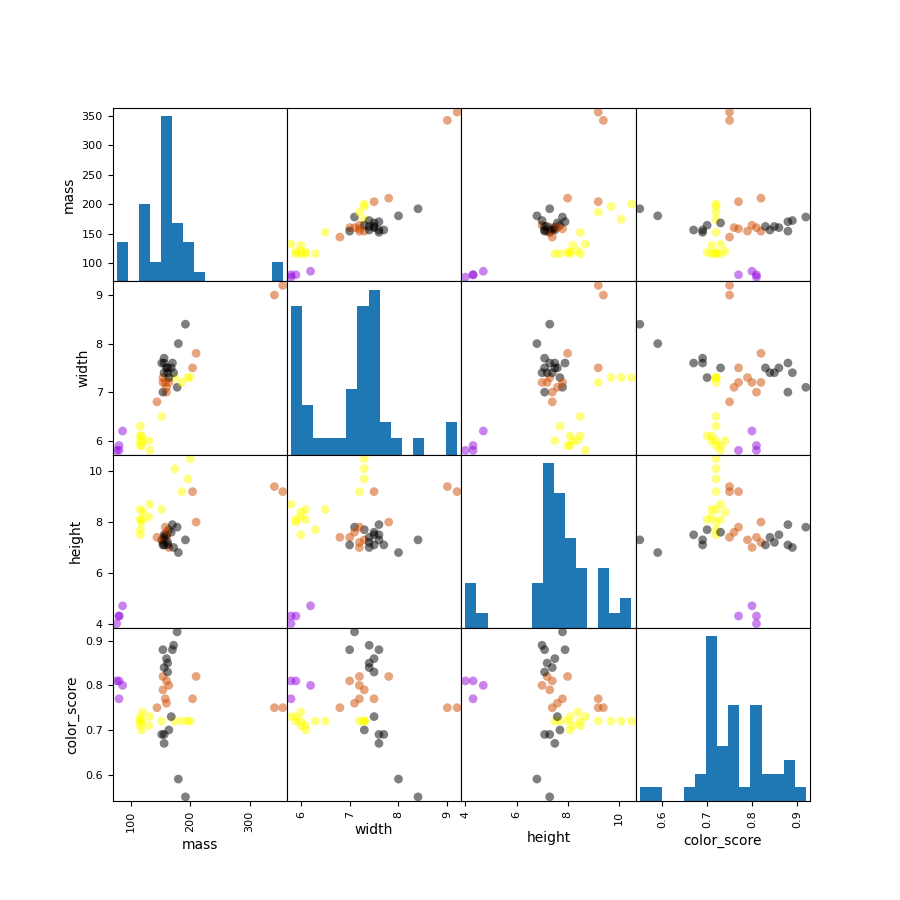

In [4]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(x_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


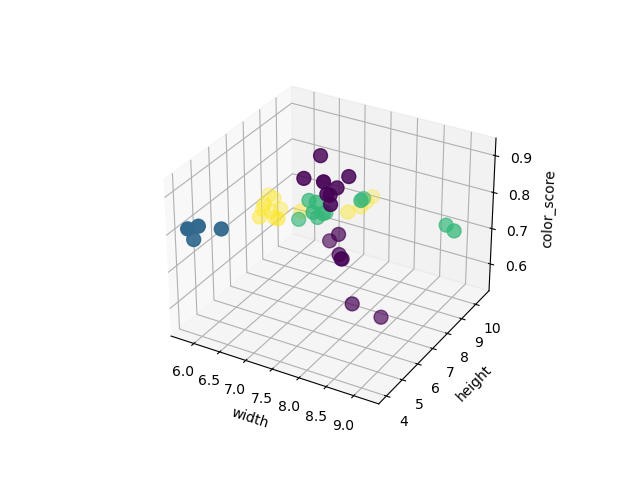

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train['width'], x_train['height'], x_train['color_score'], c = y_train, marker = 'o', s = 100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## K-Nearest Neighbors Classification
- now that we have gotten a sense of what is in our dataset, we are going to use thi data to train a classifier that will automatically identify any future pieces of fruits that might come our way based on the features available to the clasifier such as the object's color, size and mass
- To do this we will use a popular and easy to understand type of machine learning algorith known as **k-Nearest Neighbors** or **K_NN** classifier
- K-NN can be used for classification and regression though in our case we will us it for classification.
- K-NN classifiers are an example of whats called instance basd or memmory based supervised learning.
- What this means is that instance based learning methods work by memorizing the labelled examples that they see in the training set and then they use those memorized examples to classify new objects later.
- in particular, the k-nn algorithm has three steps that can be specified. Given a training set X_train wwith labels Y_train and given a new instance x_test to be classified:
    1. when given a new previously unseen instance of something to classify, a k-nn classifier will look into its set of memmorized training examples to find the k examples that have closest features.
    2. the classifier will then  look up the class labels of those k-nearest neighbor examples and then 
    3. once its done that it will combine the labels of those examples to make a prediction for the label of the new object. typically, for example, by using simple majority vote.
    
- To use the k-nearest neighbor algorithm we need to specify four things.
    1. A distance metric
        -  in our fruit dataset we will use the euclidian distance to measure the distance between points
    2. How many **nearest** neighbors to look at.
        - we must tell the algorithm how many nearest neighbors to look at so as to make a decision this must be a number that is atleast one
    3. Optional weighting function on the neighbor points
        - we might need to give some neighbors more influence on the outcome of our decision, for example we may decide that neighbors that are closer to the new instance that we are trying to classify should have more influence or more votes on the final label
    4. Method for aggregating the classes of neighbor points
        - now once we have the labels of the k-nearby labels we must specify how to combine them to produce a final prediction or decision on our new instance
    
- the most common distance metric that scikit-learn uses by default is the euclidean no straight line distance 
- we might also choose to use the five nearest neighbors for our choice of k.
- and we might specify that there is no special treatment for neighbors that are closer so we have a uniform weighting
- also by default scikit-learn will apply for the fourth criterion a simple majority vote, and it will predict the clas with the most representatives among the nearest neighbors.


## create a classifier object 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# we import the neighbor classiier from sklearn.neighbors

#we need to create an instance of the clasifier object, in this case a k-nn classifier
#we set the important parameter in this case the number of neighbors to a specific value to be used by a clasifier 
#in our example we set it as 5
knn = KNeighborsClassifier(n_neighbors= 5 )

### Training the classifier (fit the estimator) using the training data

In [7]:
#we then train the classifier by passing in the training set data in x_train and the labels in y_train to the classifier fit method
knn.fit(x_train,y_train)

KNeighborsClassifier()

### Estimating the accuracy of the clasifier on future data using the test data

In [8]:
#the first thing we can do this newly trained classifier is to see how accurate the classifier is likely to be on some new previously unseen data  instances
#and in this case our previously unseen data instance is our test split
#we will use the test split to compute the classifiers accuracy
#remember the k-nn classifier did not see any of the fruits in the test set during the training phase
#to do this we use the score method.
knn.score(x_test,y_test)
#knn.score function takes in two parameters, the x_test split which it will use the classifier to label the fruit and
#the y_test split which it will use to calculate the clasifiers accuracy
#the score is defined as the fraction or proportion of test set item whose true label was correctly predicted by the classifier

0.5333333333333333

### Use the trained K-NN clasifier model to classify new previously unseen objects

In [9]:
#this was our goal in the first place: to create a classifier that can label our fruits given the feature spacr
#for example we will enter the mas, width, height and color_score for a hypothetical piece of fruit and ask the classifier to predict the label using our created classifier.
fruit_prediction = knn.predict([[20,4.3,5.5,0.8]])
#after we get our fruit prediction which will be in integer we then cast that to our dictionary and get the fruit name predicted
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [10]:
#we will try our prediction with another type of fruit that has different characteristics(feature space)
fruit_predicted = knn.predict([[390,8.7,9.5,0.75]])
#we will then cast that to our dictionary and get the name of the fruit
lookup_fruit_name[fruit_predicted[0]]

'orange'

### how sensitive is K-NN classification accuracy to the choice of the 'K' parameter

<IPython.core.display.Javascript object>


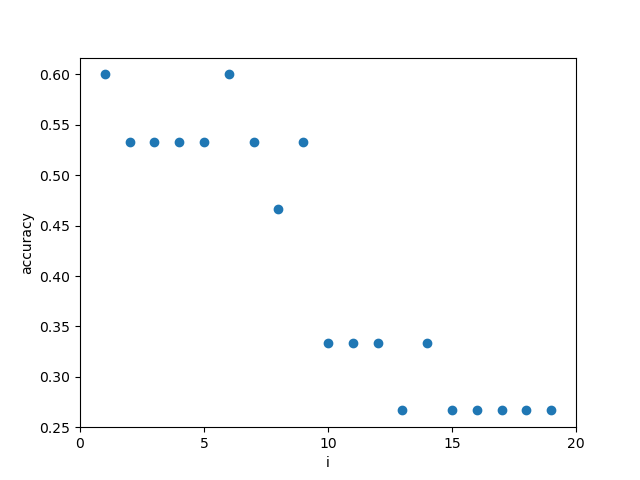

In [11]:
#if we plot the accuracy of our claifier as a function of k as shown below
k_range = range(1,20)
scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

plt.figure()
plt.xlabel('i')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
#we notice that, indeed, larger values of k do lead to worse accuracy for this particular dataset and fixed single train test split.
#keep in mind though that these results are only for this particular training test split
#to get a more reliable estimate of likely future accuracy for a particular value of k 
#we would want to look at results over multiple possible train test split
#in general the best choice of the value k, that is the one that leads to the highest accuracy, can vary greatly depending on the data set
#in general, with k-nearest neighbors, using a larger k supresses the effects of noisy individual labels but results in clasification boundaries that are less detailed.

In [ ]:
##

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1-s)
        knn.fit(x_train, y_train)
        scores.append(knn.score(x_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');